## CBOW 모델 구현

In [ ]:
w,b = [1,2]
print(w,b)

In [1]:
import sys
sys.path.append('..')
import numpy as np
from common.layers import MatMul, SoftmaxWithLoss


class SimpleCBOW:
    def __init__(self, vocab_size, hidden_size):
        V, H = vocab_size, hidden_size

        # 가중치 초기화
        W_in = 0.01 * np.random.randn(V, H).astype('f')
        W_out = 0.01 * np.random.randn(H, V).astype('f')

        # 계층 생성
        self.in_layer0 = MatMul(W_in)
        self.in_layer1 = MatMul(W_in)
        self.out_layer = MatMul(W_out)
        self.loss_layer = SoftmaxWithLoss()

        # 모든 가중치와 기울기를 리스트에 모은다.
        layers = [self.in_layer0, self.in_layer1, self.out_layer]
        self.params, self.grads = [], []
        for layer in layers:
            self.params += layer.params
            self.grads += layer.grads

        # 인스턴스 변수에 단어의 분산 표현을 저장한다.
        self.word_vecs = W_in
        
    def forward(self, contexts, target):
        h0 = self.in_layer0.forward(contexts[:, 0])
        h1 = self.in_layer1.forward(contexts[:, 1])
        h = (h0 + h1) * 0.5
        score = self.out_layer.forward(h)
        loss = self.loss_layer.forward(score, target)
        return loss
    
    def backward(self, dout=1):
        ds = self.loss_layer.backward(dout)
        da = self.out_layer.backward(ds)
        da *= 0.5
        self.in_layer1.backward(da)
        self.in_layer0.backward(da)
        return None

### 학습 코드 구현

| 에폭 1 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 2 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 3 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 4 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 5 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 6 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 7 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 8 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 9 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 10 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 11 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 12 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 13 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 14 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 15 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 16 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 17 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 18 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 19 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 20 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 21 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 22 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 23 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 24 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 25 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 26 |

| 에폭 210 |  반복 1 / 2 | 시간 0[s] | 손실 1.27
| 에폭 211 |  반복 1 / 2 | 시간 0[s] | 손실 1.13
| 에폭 212 |  반복 1 / 2 | 시간 0[s] | 손실 1.13
| 에폭 213 |  반복 1 / 2 | 시간 0[s] | 손실 1.26
| 에폭 214 |  반복 1 / 2 | 시간 0[s] | 손실 1.25
| 에폭 215 |  반복 1 / 2 | 시간 0[s] | 손실 1.06
| 에폭 216 |  반복 1 / 2 | 시간 0[s] | 손실 1.18
| 에폭 217 |  반복 1 / 2 | 시간 0[s] | 손실 1.31
| 에폭 218 |  반복 1 / 2 | 시간 0[s] | 손실 1.05
| 에폭 219 |  반복 1 / 2 | 시간 0[s] | 손실 1.31
| 에폭 220 |  반복 1 / 2 | 시간 0[s] | 손실 1.10
| 에폭 221 |  반복 1 / 2 | 시간 0[s] | 손실 1.16
| 에폭 222 |  반복 1 / 2 | 시간 0[s] | 손실 1.16
| 에폭 223 |  반복 1 / 2 | 시간 0[s] | 손실 1.16
| 에폭 224 |  반복 1 / 2 | 시간 0[s] | 손실 1.16
| 에폭 225 |  반복 1 / 2 | 시간 0[s] | 손실 1.16
| 에폭 226 |  반복 1 / 2 | 시간 0[s] | 손실 1.07
| 에폭 227 |  반복 1 / 2 | 시간 0[s] | 손실 1.22
| 에폭 228 |  반복 1 / 2 | 시간 0[s] | 손실 1.22
| 에폭 229 |  반복 1 / 2 | 시간 0[s] | 손실 1.06
| 에폭 230 |  반복 1 / 2 | 시간 0[s] | 손실 1.07
| 에폭 231 |  반복 1 / 2 | 시간 0[s] | 손실 1.13
| 에폭 232 |  반복 1 / 2 | 시간 0[s] | 손실 1.21
| 에폭 233 |  반복 1 / 2 | 시간 0[s] | 손실 1.20
| 에폭 234 |  반복 1

| 에폭 550 |  반복 1 / 2 | 시간 0[s] | 손실 0.49
| 에폭 551 |  반복 1 / 2 | 시간 0[s] | 손실 0.80
| 에폭 552 |  반복 1 / 2 | 시간 0[s] | 손실 0.77
| 에폭 553 |  반복 1 / 2 | 시간 0[s] | 손실 0.71
| 에폭 554 |  반복 1 / 2 | 시간 0[s] | 손실 0.58
| 에폭 555 |  반복 1 / 2 | 시간 0[s] | 손실 0.71
| 에폭 556 |  반복 1 / 2 | 시간 0[s] | 손실 0.72
| 에폭 557 |  반복 1 / 2 | 시간 0[s] | 손실 0.85
| 에폭 558 |  반복 1 / 2 | 시간 0[s] | 손실 0.58
| 에폭 559 |  반복 1 / 2 | 시간 0[s] | 손실 0.79
| 에폭 560 |  반복 1 / 2 | 시간 0[s] | 손실 0.54
| 에폭 561 |  반복 1 / 2 | 시간 0[s] | 손실 0.84
| 에폭 562 |  반복 1 / 2 | 시간 0[s] | 손실 0.88
| 에폭 563 |  반복 1 / 2 | 시간 0[s] | 손실 0.57
| 에폭 564 |  반복 1 / 2 | 시간 0[s] | 손실 0.54
| 에폭 565 |  반복 1 / 2 | 시간 0[s] | 손실 0.87
| 에폭 566 |  반복 1 / 2 | 시간 0[s] | 손실 0.68
| 에폭 567 |  반복 1 / 2 | 시간 0[s] | 손실 0.73
| 에폭 568 |  반복 1 / 2 | 시간 0[s] | 손실 0.75
| 에폭 569 |  반복 1 / 2 | 시간 0[s] | 손실 0.70
| 에폭 570 |  반복 1 / 2 | 시간 0[s] | 손실 0.66
| 에폭 571 |  반복 1 / 2 | 시간 0[s] | 손실 0.53
| 에폭 572 |  반복 1 / 2 | 시간 0[s] | 손실 0.87
| 에폭 573 |  반복 1 / 2 | 시간 0[s] | 손실 0.61
| 에폭 574 |  반복 1

| 에폭 899 |  반복 1 / 2 | 시간 0[s] | 손실 0.64
| 에폭 900 |  반복 1 / 2 | 시간 0[s] | 손실 0.51
| 에폭 901 |  반복 1 / 2 | 시간 0[s] | 손실 0.49
| 에폭 902 |  반복 1 / 2 | 시간 0[s] | 손실 0.75
| 에폭 903 |  반복 1 / 2 | 시간 0[s] | 손실 0.41
| 에폭 904 |  반복 1 / 2 | 시간 0[s] | 손실 0.62
| 에폭 905 |  반복 1 / 2 | 시간 0[s] | 손실 0.72
| 에폭 906 |  반복 1 / 2 | 시간 0[s] | 손실 0.58
| 에폭 907 |  반복 1 / 2 | 시간 0[s] | 손실 0.48
| 에폭 908 |  반복 1 / 2 | 시간 0[s] | 손실 0.57
| 에폭 909 |  반복 1 / 2 | 시간 0[s] | 손실 0.63
| 에폭 910 |  반복 1 / 2 | 시간 0[s] | 손실 0.47
| 에폭 911 |  반복 1 / 2 | 시간 0[s] | 손실 0.82
| 에폭 912 |  반복 1 / 2 | 시간 0[s] | 손실 0.43
| 에폭 913 |  반복 1 / 2 | 시간 0[s] | 손실 0.65
| 에폭 914 |  반복 1 / 2 | 시간 0[s] | 손실 0.65
| 에폭 915 |  반복 1 / 2 | 시간 0[s] | 손실 0.45
| 에폭 916 |  반복 1 / 2 | 시간 0[s] | 손실 0.47
| 에폭 917 |  반복 1 / 2 | 시간 0[s] | 손실 0.58
| 에폭 918 |  반복 1 / 2 | 시간 0[s] | 손실 0.51
| 에폭 919 |  반복 1 / 2 | 시간 0[s] | 손실 0.71
| 에폭 920 |  반복 1 / 2 | 시간 0[s] | 손실 0.63
| 에폭 921 |  반복 1 / 2 | 시간 0[s] | 손실 0.50
| 에폭 922 |  반복 1 / 2 | 시간 0[s] | 손실 0.65
| 에폭 923 |  반복 1

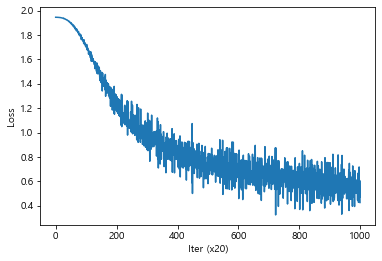

you [ 1.360675  -1.0495058  1.0329748 -1.3062589 -0.9632287]
say [ 0.14348485  1.1999359  -1.1507938   1.2130941   1.1689125 ]
goodbye [ 0.54592055 -0.81839854  0.9842429  -0.428346   -0.9517774 ]
and [-1.8888482  1.0264828 -1.1884699  1.0683463  0.957192 ]
i [ 0.53374934 -0.82012653  1.0035721  -0.4215505  -0.99996793]
hello [ 1.3691373  -1.0501716   1.0228796  -1.3048661  -0.98243576]
. [ 1.6231108   1.0212097  -0.37185127  0.9842147   1.0247267 ]


In [2]:
import sys
sys.path.append('..')  
from common.trainer import Trainer
from common.optimizer import Adam
from common.util import preprocess, create_contexts_target, convert_one_hot
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')

window_size = 1
hidden_size = 5
batch_size = 3
max_epoch = 1000

text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)

vocab_size = len(word_to_id)
contexts, target = create_contexts_target(corpus, window_size)
target = convert_one_hot(target, vocab_size)
contexts = convert_one_hot(contexts, vocab_size)

model = SimpleCBOW(vocab_size, hidden_size)
optimizer = Adam()
trainer = Trainer(model, optimizer)

trainer.fit(contexts, target, max_epoch, batch_size)
trainer.plot()

word_vecs = model.word_vecs
for word_id, word in id_to_word.items():
    print(word, word_vecs[word_id])